<a href="https://colab.research.google.com/github/WellingtonMartinsSantos/Competi-o-Flai/blob/main/IV_Desafio_de_Machine_Learning_da_Flai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center' >Empresa de Telecomunicação</h1>

<p align="center">
<img align='center' src="https://github.com/WellingtonMartinsSantos/Competi-o-Flai/blob/main/Data/Titulo%20Competi%C3%A7%C3%A3o.PNG?raw=true">
</p>

---

Alguma vez você já se perguntou porque o retângulo verde na tela do seu celular aparece? Por que ao conversar com um amigo sobre a compra de um tênis, notebook ou uma camisa, lhe aparecerá anúncios em suas redes sociais, sites ou até mesmo e-mail? Essas são algumas das aplicações de Machine Learning, que visam melhorar o desempenho de uma tarefa ou, dependendo da aplicação, tomar a decisão mais apropriada para o contexto. Essas regras são geradas com base no reconhecimento de padrões dentro dos dados analisados.   


Como proposta para o 4º Desafio de Machine Learning da Flai, dado um conjunto de dados de uma empresa de telecomunicação para prever se um cliente é Premium ou Normal. Esse é um dos problemas em uma empresa de telecomunicação e a aplicação de machine learning em conjunto com a análise de dados nos auxiliará a dizer qual é categoria dos clientes, para gerar efetividade na venda dos produtos, assim, reduzindo os custos e aumentando os lucros.

O objetivo principal do desafio era modelar uma solução que apresentasse o melhor F1-Score na previsão da categoria dos clientes segundo os dados fornecidos. 

Vamos abordar aqui algumas técnicas de pré-processamento e de predição que nos levaram ao décimo sexto na competição. Vamos tentar entender quais fatores levam um cliente a ser Premium ou Normal, tentando responder algumas perguntas sobre o perfil do cliente:
1. Fatores como Genero, Suporte Técnico, Tenure(a posse), Segurança online e OnlineBackup têm alguma ligação com a categória do cliente?
2. Se o cliente possui Serviço de telefone, dependentes ou parceiro que leva uma representatividade na resposta?

Para responder a essas perguntas e obtermos uma boa predição seguiremos algumas etapas:
* Entendimento do problema
* Obtenção dos dados
* Análise exploratória dos dados
* Pré-Processamento
* Modelagem
* Combinação de Modelos



**Resumo do que será abordado neste projeto**

Competição de classificação binária a partir de um conjunto com variáveis qualitativas e quantitativas sem valores faltantes. Foi feita uma análise exploratória e manipulação das variáveis. Como método de validação foi utilizado o K-Fold (10-Folds) estratificado com a métrica F1-Score. Dentre os modelos de aprendizagem de máquina, se destacaram o AdaBoost, Rede Neural MLP e Gradient Boosting. Para solução final foi utilizado a combinação destes três modelos com o método Hard, depois de um GridSearch dos melhores hiperparâmetros. O F1-Score alcançado: 93,1489 %.

---
<p align="center">
<img src="https://github.com/WellingtonMartinsSantos/Competi-o-Flai/blob/main/Data/CorpoCompeti%C3%A7%C3%A3o.PNG?raw=true" />
</p>

---


#Sumário
1. Importação dos dados
2. Análise Exploratória
3. Pré-processamento
4. Modelagem
5. Busca por Melhores Hiperparâmetros
6. Combinação por votos
7. Submissão
8. Conclusões
9. Considerações

# 1 Importação dos dados

##1.1 Bibliotecas
Primeiro, devemos importar algumas bibliotecas. _Pandas_ e _Numpy_ para manipulação do Conjunto de Dados, _Seaborn_ e _Matplot_ para criação de gráficos.

In [ ]:
import pandas as pd 
import numpy as  np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler #Para normalização de intervalos

#from sklearn.feature_selection import SelectFromModel #seleção de váriaveis pela importancia nos resultados
#from matplotlib.axes._axes import _log as matplotlib_axes_logger
#Algorítimos de aprendizagem
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

#Modelos de busca por melhores parâmetros de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time#contagem de tempo para execução de tarefas

##1.2 Importação do Conjunto de dados
O conjunto **Treino** contem a variável resposta de interesse (_Cliente_)  e o conjunto **Teste** contem todas as colunas do conjunto de treino, menos a variável resposta. O Treino é o conjunto que deve ser _predito_ pelo modelo criado e enviado para submissão da competição.

In [ ]:
# importanto os conjuntos de dados disponíveis nesta mesma pasta Data
treino = pd.read_csv('https://raw.githubusercontent.com/WellingtonMartinsSantos/Competi-o-Flai/main/Data/treino.csv')
sub = pd.read_csv('https://raw.githubusercontent.com/WellingtonMartinsSantos/Competi-o-Flai/main/Data/teste.csv')


#2 Análise Exploratória de Dados

##2.1 Valores nulos e tipos de colunas

In [ ]:
print("Valores no Conjunto de TREINO:\n")
print(treino.info())

Valores no Conjunto de TREINO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-n

In [ ]:
print("\n\nValores no Conjunto da Submissão:\n")
print(sub.info())




Valores no Conjunto da Submissão:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 

O comando "info" mostra o total de observações em cada coluna, bem como o tipo de dado daquela coluna, se é numérico ou texto. 

Ambos conjuntos de dados possuem a quantia de linhas que foram informadas pelo enunciado da competição (2500 treino, e 2500 submissão). Mostrando que não há dados faltantes. Caso houvesse, poderíamos utilizar a média ou a mediana para preencher esses dados para os numéricos, ou utilizar um algoritmo, como o KNN para preencher esses dados com uma predição no próprio conjunto.

Podemos ver que há variáveis numéricas (int64) e string (object). Muitos algoritmos não suportam strings, por isso precisaremos transformar essas colunas futuramente.

##2.2 Vizualização do Conjunto de dados
Como o objetivo é tentar prever a categoria dos clientes, trabalharemos apenas com o conjunto de dados de Treinamento (que possui a variável resposta) para realizar o treinamento de algoritmos supervisionados.

O comando _head_ oferece as primeiras linhas do conjunto de dados.


In [ ]:
treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,Normal
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,Premium
2,Female,0,Yes,Yes,68,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),Premium
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,Premium
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,Normal


##2.3 Separando colunas categóricas e numéricas
Vamos mapear o conjunto de dados em colunas do tipo _objeto_ e as numericas (_int64_).

Faremos essa análise separadamente, pois para cada tipo de coluna traz uma informação diferente dos dados.

In [ ]:
coluna_numerica = treino.columns[treino.dtypes == "int64"] #Colunas de variáveis numericas
coluna_object = treino.columns[treino.dtypes == "object"] #Colunas do tipo numéricas

###2.3.1 Colunas Categóricas

Vamos fazer uma contagem das observações e categorias de cada coluna, para termos uma noção de como nosso conjunto de dados esta distribuido.

In [ ]:
for i in coluna_object:
  print("Coluna: ",i)
  print(treino[i].value_counts(), "\n")

Coluna:  gender
Male      1285
Female    1215
Name: gender, dtype: int64 

Coluna:  Partner
No     1278
Yes    1222
Name: Partner, dtype: int64 

Coluna:  Dependents
No     1754
Yes     746
Name: Dependents, dtype: int64 

Coluna:  PhoneService
Yes    2261
No      239
Name: PhoneService, dtype: int64 

Coluna:  MultipleLines
No                  1236
Yes                 1025
No phone service     239
Name: MultipleLines, dtype: int64 

Coluna:  InternetService
Fiber optic    1079
DSL             880
No              541
Name: InternetService, dtype: int64 

Coluna:  OnlineSecurity
No                     1253
Yes                     706
No internet service     541
Name: OnlineSecurity, dtype: int64 

Coluna:  OnlineBackup
No                     1114
Yes                     845
No internet service     541
Name: OnlineBackup, dtype: int64 

Coluna:  DeviceProtection
No                     1089
Yes                     870
No internet service     541
Name: DeviceProtection, dtype: int64 

Colu

Agora temos uma noção de como estão distribuídas as categorias.
É possível ver que a coluna _PhoneService_ tem uma relação de menos de 11% dos dados como inadimplentes. Outras colunas também apresentam uma grande concentração em uma única categoria, vamos fazer uma análise gráfica para tirar mais algumas informações.


####2.3.1.1 Análise Gráfica Variáveis Categóricas
Aqui vamos buscar relações entre a chance de ser um cliente Premium ou Normal com alguma das colunas categóricas. 
Essa visão nos permite inferir algumas informações sobre o impacto de cada categoria sob a variável resposta de interesse (_Cliente_).

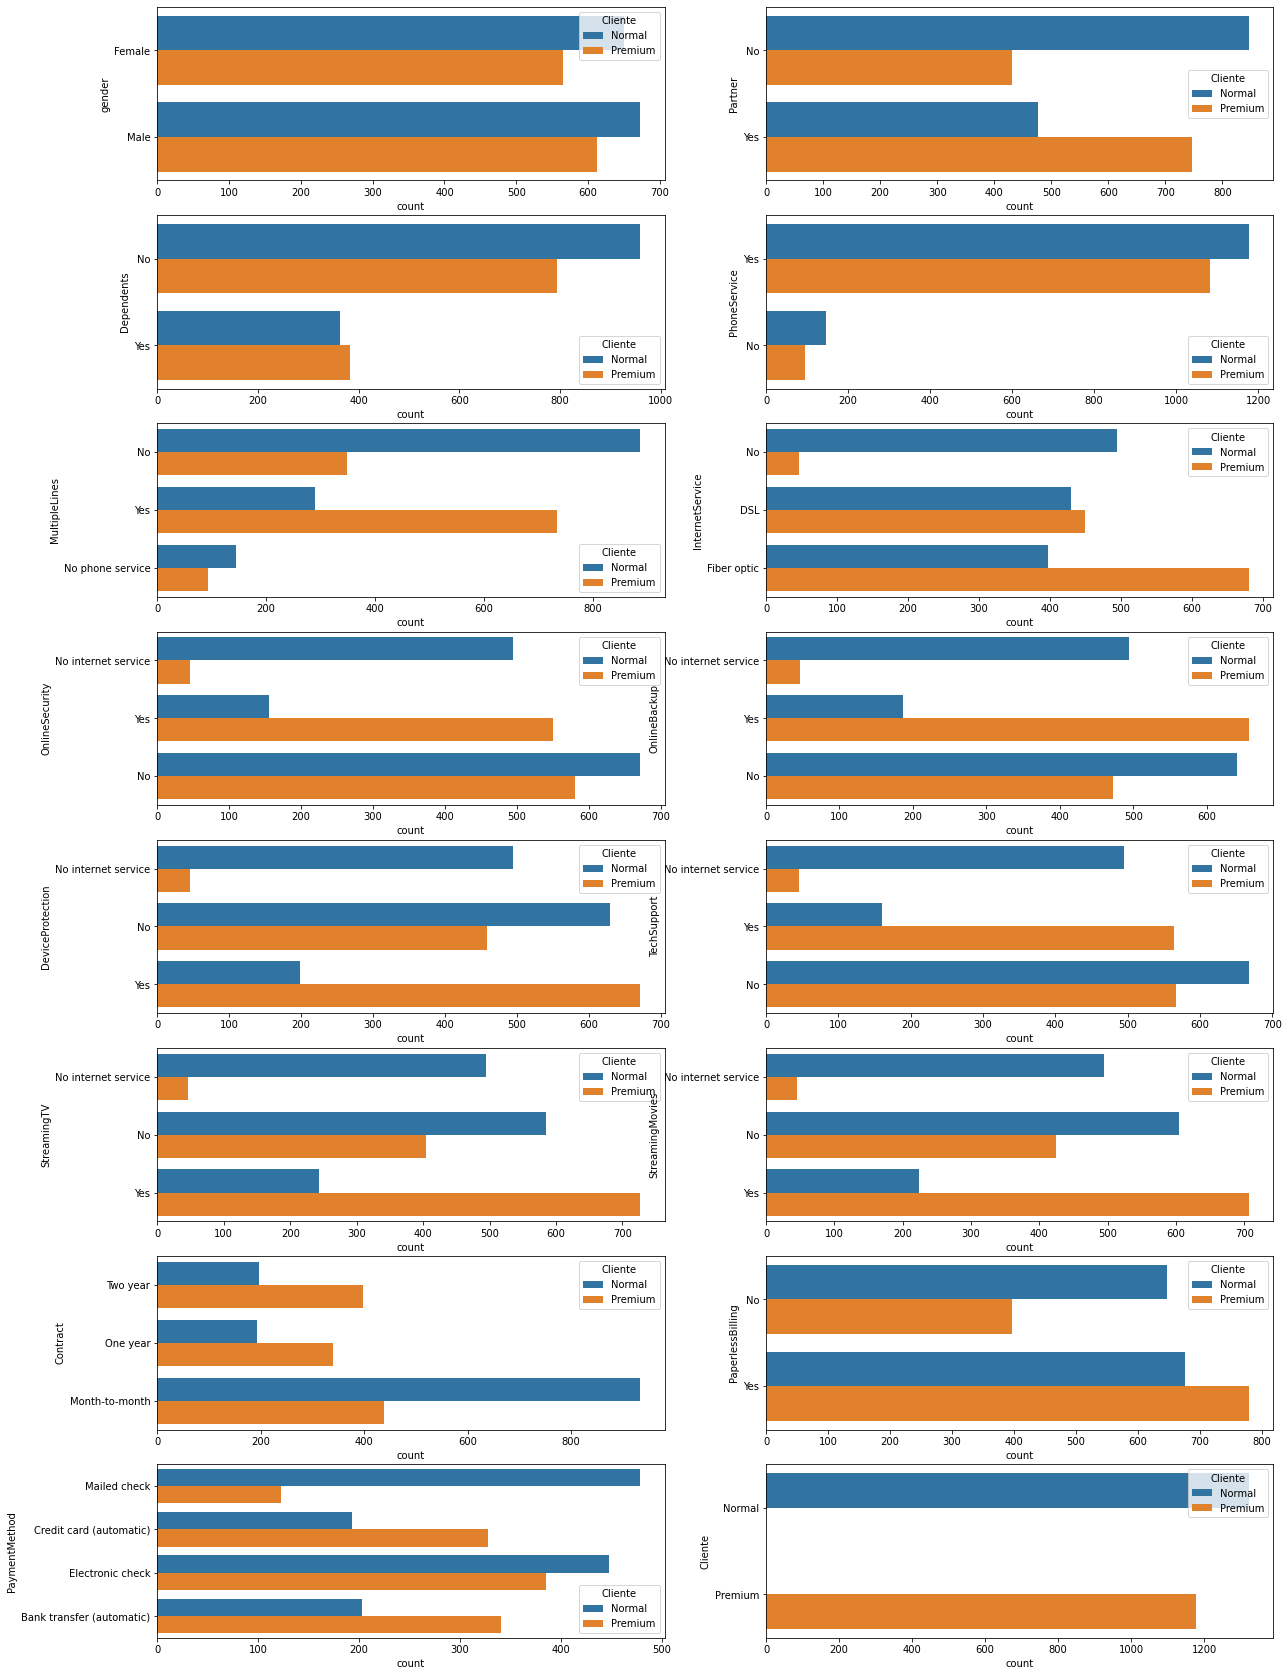

In [ ]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,17):
  plt.subplot(8,2,i)
  sns.countplot(data = treino, y=coluna_object[i-1], hue='Cliente')

Podemos observar que aqueles que tem como resposta Yes(sim) para  _DeviceProtection_, _StreamingTV_, _StreamingMovies_, _OnlineBackup_, _TechSuport_, _OnlineSecurity_ e _MultipleLines_  têm uma maior chance de ser um cliente Premium. 

Também notamos essa relação para resposta No Internet service (Sem serviço de internet) para variaveis _InternetService_,  _OnlineBackup_, _StreamingMovies_, _TechSuport_, _DeviceProtection_, _StreamingTV_, _OnlineSecurity_,  em que tem uma chance maior de ser um cliente Normal. 

Observamos também que o metódo de pagamento (_PaymentMethod_) - Mailed check e _MultipleLines_ - No, têm maior chance de ser um cliente Normal, se comparado com os outros.

Já para as caracterisiticas _PhoneService_, _gender_, _Dependents_, _Partner_ e _PaperlessBilling_ temos uma relação praticamente neutra.

###2.3.2 Colunas Numéricas

####2.3.2.1 Gráfico Variáveis numericas
Para as variáveis numéricas faremos um gráfico que criar pequenos agrupamentos de valores parecidos e ver sua representatividade no conjunto de dados ao mesmo tempo que analisamos comparativamente com a variável resposta.

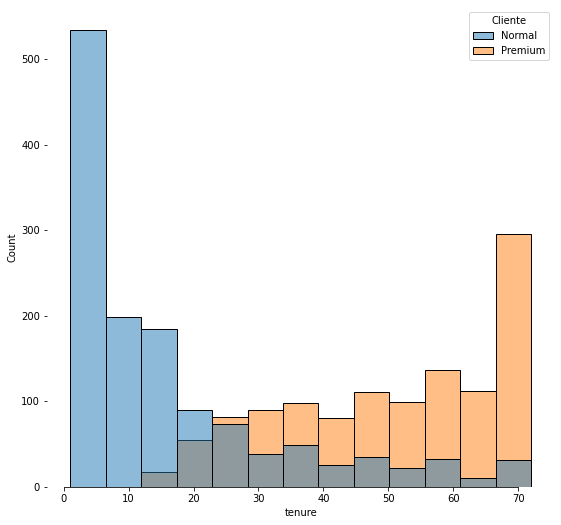

In [ ]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,2):
  plt.subplot(3,2,i)
  sns.histplot(treino, x=coluna_numerica[i], hue='Cliente')
  ax.xaxis.grid(True)
  sns.despine(trim=True, left=True)

Podemos observar que para a Posse/titular (_tenure_) a maioria dos clientes Normal se encontra entre os 0 e 20, e por volta de 25 a 70 sendo mais propensos a clientes Premium.

####2.3.2.2 Identificando Outliers
Vamos utilizar um gráfico boxplot para vizualizar a distribuição dos dados em suas faixas de valores.

A faixa central do gráfico mostra a mediana (termo central), os quartis limitados pela caixa, e os valores muito acima ou muito baixo dos quartis.

Essa análise nos ajuda a identificar valores muito discrepantes em relação aos demais, e onde se concentram a maioria dos valores.

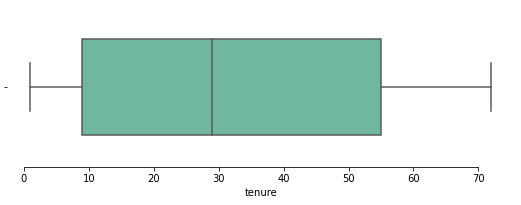

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))

for i in range(1,2):
  plt.subplot(3,2,i)
  sns.boxplot(x = treino[coluna_numerica[i]], width=.6, palette="BuGn")
  ax.xaxis.grid(True)
  ax.set(ylabel="")
  sns.despine(trim=True, left=True)

O Titular (_tenure_) possui os valores em uma faixa de 0 a 70, com a médiana próximo de trinta. A distribuição dos valores não apresentam nenhuma anormalidade/ discrepancia significatica para analise dos dados.

####2.3.2.3 Identificação de uma particularidade nos dados

In [ ]:
#eliminar duplicates
data_treino = treino.drop_duplicates(ignore_index=True)
data_treino.shape #mostra a quantidade final de colununas


(2392, 18)

#3 Pré-Processamento
Com a de exploração de dados finalizada, conseguimos tirar boas conclusões do conjunto de dados e com isso determinar possíveis abordagens para o pré-processamento.

Vamos realizar uma cópia do conjunto de dados e, a cada etapa, gerar um novo conjunto modificado. Quando o conjunto de dados é pequeno, manter uma cópia da etapa anterior é benéfico para que possamos voltar algumas etapas sem precisar rodar todo o código novamente, mas para grandes conjuntos isso pode se tornar um problema, devido a demanda por armazenamento.

##3.1 Mapeando colunas
 Como mencionado, é preciso que todas as colunas do tipo _objetc_, ou seja, aquelas que possuem texto sejam transformadas em colunas numéricas para que os modelos de machile learnin possam funcionar. 

Vamos transformar as colunas categóricas que possuem apenas as respostas SIM e NÃO em 
"0" para NÃO e "1" para SIM.

In [ ]:
#Mapeando em 0  e 1 as colunas bivariadas comum a todos
data_treino_map = data_treino.copy()
data_sub = sub.copy()
data_treino_map['Partner'] = data_treino_map['Partner'].map({'Yes': 1, 'No':0})
data_treino_map['Dependents'] = data_treino_map['Dependents'].map({'Yes': 1, 'No':0})
data_treino_map['PhoneService'] = data_treino_map['PhoneService'].map({'Yes': 1, 'No':0})
data_treino_map['PaperlessBilling'] = data_treino_map['PaperlessBilling'].map({'Yes': 1, 'No':0})
data_treino_map['gender'] = data_treino_map['gender'].map({'Male': 1, 'Female':0})
data_treino_map['Cliente'] = data_treino_map['Cliente'].map({'Normal': 0, 'Premium': 1})
data_treino_map.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,0,0,0,0,20,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,0
1,0,0,1,1,59,1,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,0,Mailed check,1
2,0,0,1,1,68,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),1
3,0,0,0,1,35,1,Yes,DSL,No,No,No,No,No,No,Month-to-month,0,Mailed check,1
4,1,1,0,0,1,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Electronic check,0


##3.2 Normalizando os valores

Para um melhor desempenho dos algoritimos valos padronizar os valores, para que eles tenham a mesma faixa de valores. Isso é preciso para que alguns dados com valores muito altos não sejam interpretados como mais importantes que outros dados. Por isso vamos tentar deixar todas as colunas com faixas de valores similares entre -2 e 2.

> Por exemplo, a coluna _tenure_ possui valores de 0 a 70, enquanto a coluna _	SeniorCitizen_ possui valores de 0 e 1. Para os algoritmos os valores de _tenure_ podem ser interpretados com maior importância (peso) que os valores de _SeniorCitizen_, o que não é nescessarimanete verdade.

Utilizaremos a função _StandardScaler_. Onde para cada entrada de cada coluna é subtraída a média da coluna e divido pelo desvio padrão daquela coluna. Isso faz com que não percamos informação durante a transformação, mantendo a essência do dado.

In [ ]:
sc = StandardScaler()
data_treino_norm = data_treino_map.copy()
aux0 = sc.fit_transform(data_treino_norm[['tenure']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux1 = pd.DataFrame(aux0, columns = ['Tenure'])#transforma num data frame o numpy array e adicionado ao data frame
data_treino_norm = pd.concat([data_treino_norm, aux1], axis = 1)#concatena com o o conjunto de dados
data_treino_norm.drop(['tenure'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados
data_treino_norm.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,Tenure
0,0,0,0,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,0,-0.545398
1,0,0,1,1,1,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,0,Mailed check,1,1.069760
2,0,0,1,1,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),1,1.442489
3,0,0,0,1,1,Yes,DSL,No,No,No,No,No,No,Month-to-month,0,Mailed check,1,0.075817
4,1,1,0,0,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Electronic check,0,-1.332270


##3.3 Testando abordagens distintas
A maioria dos algoritmos de Machine Learning não suportam entradas de valores que não sejam numéricos, por isso precisamos transformar todos os dados deste tipo em números. Para isso tentaremos fazer algumas transformações diferentes e ver qual tem o melhor resultado F1-Score. Então tentaremos:
1. Transformar todas as categorias em números;
2. Transformar cada categoria em uma nova coluna (Dummy);
3. Fazer uma combinação destas duas.

###3.3.1 Transformando variáveis Categóricas em numéricas
Vamos simplesmente identificar as categorias presentes em cada coluna e atribuir um número ordinal a ela. 

Para a coluna _TechSupport_, por exemplo, transformaremos No em 0, Yes em 1 e No internet service em 2.

Observe que ao final só temos números nas colunas.

In [ ]:
data_treino_norm_num = data_treino_norm.copy()

data_treino_norm_num['OnlineSecurity'] = data_treino_norm_num['OnlineSecurity'].map({'No': 0, 'Yes':1,'No internet service': 2})
data_treino_norm_num['OnlineBackup'] = data_treino_norm_num['OnlineBackup'].map({'No': 0, 'Yes':1,'No internet service': 2})
data_treino_norm_num['DeviceProtection'] = data_treino_norm_num['DeviceProtection'].map({'No': 0, 'Yes':1,'No internet service': 2})
data_treino_norm_num['TechSupport'] = data_treino_norm_num['TechSupport'].map({'No': 0, 'Yes':1,'No internet service': 2})
data_treino_norm_num['StreamingTV'] = data_treino_norm_num['StreamingTV'].map({'No': 0, 'Yes':1,'No internet service': 2})
data_treino_norm_num['StreamingMovies'] = data_treino_norm_num['StreamingMovies'].map({'No': 0, 'Yes':1,'No internet service': 2})
data_treino_norm_num['Contract'] = data_treino_norm_num['Contract'].map({'Month-to-month': 0, 'Two year':1,'One year': 2})
data_treino_norm_num['MultipleLines'] = data_treino_norm_num['MultipleLines'].map({'No': 0, 'Yes':1,'No phone service': 2})
data_treino_norm_num['InternetService'] = data_treino_norm_num['InternetService'].map({'Fiber optic': 0, 'DSL': 1,'No': 2})
data_treino_norm_num['PaymentMethod'] = data_treino_norm_num['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1,'Bank transfer (automatic)': 2,'Credit card (automatic)':3})

data_treino_norm_num.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,Tenure
0,0,0,0,0,1,0,2,2,2,2,2,2,2,1,0,1,0,-0.545398
1,0,0,1,1,1,1,1,1,1,0,1,0,0,2,0,1,1,1.069760
2,0,0,1,1,0,2,1,0,1,1,1,1,1,1,0,3,1,1.442489
3,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0.075817
4,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,-1.332270


###3.3.2 Dummy das colunas
Ao invés de atribuir um valor arbitrário, vamos simplesmente criar uma nova coluna para aquela categoria atribuindo o valor 1 para sim e 0 para não.

Para a mesma coluna _TechSupport_, criaremos três novas colunas: _TechSupport_No_, _TechSupport_Yes_ e _TechSupport_No internet Service_. Sendo atribuídos o valor 1 a apenas uma destas colunas, indicando se a pessoa tem,ou não tem suporte técnico em colunas diferentes.

Isso nem sempre é uma boa prática, pois acaba gerando muitas colunas novas, deixando um conjunto de dados muito maior.

In [ ]:
data_treino_norm_dumi = data_treino_norm.copy()
data_treino_norm_dumi = pd.get_dummies(data_treino_norm_dumi, columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','MultipleLines','InternetService','PaymentMethod'])
data_treino_norm_dumi.head()
data_treino_norm_dumi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   2392 non-null   int64  
 1   SeniorCitizen                            2392 non-null   int64  
 2   Partner                                  2392 non-null   int64  
 3   Dependents                               2392 non-null   int64  
 4   PhoneService                             2392 non-null   int64  
 5   PaperlessBilling                         2392 non-null   int64  
 6   Cliente                                  2392 non-null   int64  
 7   Tenure                                   2392 non-null   float64
 8   OnlineSecurity_No                        2392 non-null   uint8  
 9   OnlineSecurity_No internet service       2392 non-null   uint8  
 10  OnlineSecurity_Yes                       2392 no

Agora temos um conjunto totalmente numérico, mas em contrapartida temos 39 colunas, 23 colunas a mais que as 16 inicial.

In [ ]:
data_treino_norm_dumi.shape

(2392, 39)

###3.3.3 Abordagem mista
Por fim, faremos uma abordagem mista das técnicas, transformando algumas colunas em numéricas e criaremos algumas novas colunas. 

Além disso, ao invés de criar números arbitrários para as categorias, irei atribuir "pesos" de acordo com o número de ocorrências no conjunto de dados total. Isto é, farei a contagem para cada observação e atribuirei esse número aquela categoria.

Para a coluna _TechSupport_, ao invés de atribuir 1 ,2 ou 3 de acordo com a categoria de No, Yes e No internet Service aparece, irei contar quantas vezes o estado No aparece, por exemplo, e atribuirei esse número de observações a ele.

In [ ]:
data_treino_norm_mista = data_treino_norm.copy()

#Atribuindo "Pesos" a variáveis categóricas antes de numerificar
#faz a contagens de observações em cada coluna
data_treino_InternetService = data_treino_norm_mista['InternetService'].value_counts().to_dict()
data_treino_Contract = data_treino_norm_mista['Contract'].value_counts().to_dict()
data_treino_PaymentMethod = data_treino_norm_mista['PaymentMethod'].value_counts().to_dict()
#Atribui o número de observações a respectiva categoria
data_treino_norm_mista['InternetService']=data_treino_norm_mista['InternetService'].map(data_treino_InternetService)
data_treino_norm_mista['Contract']=data_treino_norm_mista['Contract'].map(data_treino_Contract)
data_treino_norm_mista['PaymentMethod']=data_treino_norm_mista['PaymentMethod'].map(data_treino_PaymentMethod)


#As colunas Contact e poutcome serão dumificadas
data_treino_norm_mista = pd.get_dummies(data_treino_norm_mista, columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MultipleLines'])
data_treino_norm_mista.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,Cliente,Tenure,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,0,0,1,490,580,0,550,0,-0.545398,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0,0,1,1,1,858,529,0,550,1,1.069760,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
2,0,0,1,1,0,858,580,0,517,1,1.442489,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
3,0,0,0,1,1,858,1283,0,550,1,0.075817,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,1,0,0,1,858,1283,0,790,0,-1.332270,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


Devido a atribuição de pesos, estamos com uma amplitude muito alta em algumas colunas, por isso irei aplicar uma nova normalização apenas para essas colunas.

In [ ]:
#normalizando os dados novos
sc2 = StandardScaler()

aux2 = sc2.fit_transform(data_treino_norm_mista[['InternetService','Contract', 'PaymentMethod']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux3 = pd.DataFrame(aux2, columns = ['InternetServiço', 'Contrato', 'Pagamento'])#transforma num data frame o numpy array e adicionado ao data frame
data_treino_norm_mista = pd.concat([data_treino_norm_mista, aux3], axis = 1)#concatena com o o conjunto de dados
data_treino_norm_mista.drop(['InternetService','Contract', 'PaymentMethod'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados

#4 Modelagem

Com o pré-processamento terminado, vamos separar os 4 conjunto de dados para inserção nos modelos. 

Retomando o que fizemos até aqui:


*   1 - Fizemos a identificação das variáveis e as relações com o Cliente;
*   2 - Utilizamos uma abordagem para lidar com as variáveis categóricas, uma transformando as categorias em números e outra criando para cada categoria uma nova coluna.


In [ ]:

#Colunas Numerificadas
Xtreino_1 = data_treino_norm_num.drop(['Cliente'], axis=1)
Ytreino_1 = data_treino_norm_num['Cliente'].to_list()
print(Xtreino_1.shape) 
#Colunas dummificadas
Xtreino_2 = data_treino_norm_dumi.drop(['Cliente'], axis=1)
Ytreino_2 = data_treino_norm_dumi['Cliente'].to_list()
print(Xtreino_2.shape)
#Abordagem Mista com Pesos
Xtreino_3 = data_treino_norm_mista.drop(['Cliente'], axis=1)
Ytreino_3 = data_treino_norm_mista['Cliente'].to_list()
print(Xtreino_3.shape)

(2392, 17)
(2392, 38)
(2392, 31)


##4.1 Método

Como método de validação usarei 10-Folds (K-Fold) Estratificado repetindo 10 vezes o método. Isso tende a evitar um overfitting e trazer um modelo mais estável.

O K-Fold separa o conjunto de dados K partes iguais, utilizando K-1 delas para treinamento e a parte K para validar (testar) o modelo. Repetindo o processo até que todas as K partições tenham sido utilizadas tanto para treinamento quanto para teste. 

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

##4.2 Métrica
Como parte da competição utilizaremos o F1-Score, que é uma média harmônica entre a precisão e a sensibilidade. Quando a Precisão estiver baixa, por mais que o Recall esteja alto, o F1-score dara um resultado baixo, e vice-versa. Isso possibilita que olhemos para uma única métrica ao invés de duas.

Aqui temos uma matriz de confusão, que indica os erros e os acertos do nosso modelo, comparando com o resultado esperado.

---
<img src="https://www.researchgate.net/profile/Fabio-Araujo-Da-Silva/publication/323369673/figure/fig5/AS:597319787479040@1519423543307/Figura-13-Exemplo-de-uma-matriz-de-confusao.png">


---
**Verdadeiro** é a predição correta do modelo. **Falso** é a precição errada do modelo.

$ Sendo:$

<img src="https://miro.medium.com/max/2160/1*t1vf-ofJrJqtmam0KSn3EQ.png">

##4.3 Melhor pré-processamento

Devido ao alto custo computacional de testar vários algoritmos, vou selecionar apenas o algoritmo que obteve o melhor desempenho nos testes anteriores realizados durante a competição.

In [ ]:
modelo_Grad = GradientBoostingClassifier() #Modelo
resultados = pd.DataFrame() #dataframe vazio para armazenar os resultados

#Abordagem Numerica
mol_Grad = cross_validate(modelo_Grad, Xtreino_1, Ytreino_1, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1)
dic = {'F1-Score': [mol_Grad['test_f1'].mean()], 'Precisão': [mol_Grad['test_precision'].mean()], 'Recall': [mol_Grad['test_recall'].mean()]}
resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Numerica'])])

#Abordagem Dummy
mol_Grad = cross_validate(modelo_Grad, Xtreino_2, Ytreino_2, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1)
dic = {'F1-Score': [mol_Grad['test_f1'].mean()], 'Precisão': [mol_Grad['test_precision'].mean()], 'Recall': [mol_Grad['test_recall'].mean()]}
resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Dummy'])])

#Abordagem Mista
mol_Grad = cross_validate(modelo_Grad, Xtreino_3, Ytreino_3, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1)
dic = {'F1-Score': [mol_Grad['test_f1'].mean()], 'Precisão': [mol_Grad['test_precision'].mean()], 'Recall': [mol_Grad['test_recall'].mean()]}
resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Mista'])])

resultados = resultados.sort_values('F1-Score', ascending=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.1s finished


In [ ]:
resultados.head(40)#Exibindo os resultados

,F1-Score,Precisão,Recall
Dummy,0.983027,0.982523,0.983691
Mista,0.982532,0.982149,0.983089
Numerica,0.981247,0.982302,0.980339


O pré-processamento Dummy teve um desempenho ligeiramente melhor do que a Mista das colunas. Já a Numerificação mostrou o pior resultado com o algoritmo testado.

Aqui vale uma ressalva, que dependendo do algoritmo base testado, outro conjunto poderia ter tido um resultado melhor. Entretanto, como buscamos os 3 melhores modelos para fazer uma combinação, os melhores resultados alcançados foram alcançados com os conjuntos Dummy e misto na maioria dos casos.

In [ ]:
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '45-Vizinhos Mais Próximos',
    'Default-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    'Rede Neural MLP (10)',
    'Rede Neural MLP (10,10)',
    'Rede Neural MLP (100)']

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 45),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000)]

Definido os modelos, vamos agora colocar em um laço de repetição para percorrer todos com o conjunto de dados escolhido anteriormente.

Usaremos o mesmo método de validação K-Fold para mesma métrica F1.

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)#Validação KFold Estratificado
resultados = pd.DataFrame() #dataframe vazio para guardar os resultados
i = 1
for i, modelo in enumerate(classifiers):
    print('Ajustando o modelo', nome[i])
    mol_testes = cross_validate(modelo, Xtreino_2, Ytreino_2, cv = validacao, 
                                scoring = ['accuracy','recall', 'f1', 'precision'],
                                verbose = 2, n_jobs = -1)
    #atribui as métricas para o dataframe para comparação
    acc = mol_testes['test_accuracy'].mean() #vamos guardar também a accuracy para efeitos de comparação
    f1s = mol_testes['test_f1'].mean()
    pre = mol_testes['test_precision'].mean()
    rec = mol_testes['test_recall'].mean()
    #Atribuindo os resultado ao dataframe resultados
    dic = {'F1-Score': [f1s], 'Precisão': [pre], 'Recall': [rec], 'Acurácia': [acc]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])

Ajustando o modelo 5-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo 45-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Default-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Árvore de Decisão


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Regressão Logística


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Análise Discriminante Linear


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Análise Discriminante Quadrática


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Bagging de Árvores


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Bagging de Regressão Logística


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Floresta Aleatória


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo AdaBoost


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Extra Árvores


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Classificador Passivo Agressivo


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Gradient Boosting


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Gaussian Naive Bayes


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Support Vector Machine (Linear)


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Support Vector Machine (RBF)


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Support Vector Machine (Poli.G3)


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Support Vector Machine (Sigmoid)


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Rede Neural Perceptron


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Rede Neural MLP (10)


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Rede Neural MLP (10,10)


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ajustando o modelo Rede Neural MLP (100)


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia
Gradient Boosting,0.983573,0.982886,0.984383,0.983987
AdaBoost,0.982458,0.983705,0.981371,0.982943
Rede Neural MLP (100),0.981250,0.982865,0.979820,0.981771
Rede Neural MLP (10),0.979761,0.982529,0.977168,0.980350
"Rede Neural MLP (10,10)",0.979078,0.981658,0.976734,0.979681
Floresta Aleatória,0.975325,0.972745,0.978112,0.975876
Bagging de Árvores,0.974094,0.980268,0.968246,0.974960
Support Vector Machine (RBF),0.971856,0.976515,0.967466,0.972743
Support Vector Machine (Poli.G3),0.970201,0.972421,0.968243,0.971027
Regressão Logística,0.969370,0.972571,0.966445,0.970274


Podemos observar pelos tempos de execução, que o maior tempo de treinamento ficou por conta do modelo de redes neurais MLP, que não necessariamente, se saíu melhor que outros modelos menos custosos.

Por fim temos que o _Gradient Boosting_ ficou com o melhor F1-Score, seguidos do AdaBoost e da Rede Neural MLP (100). 

Vamos usar esses três modelos para fazer uma combinação _Hard_, mas antes vamos buscar seus melhores hyperparâmetros para que obtenham melhores resultados que seus algoritmos base.

### 4.4.1 Comparação Gráfica dos resultado

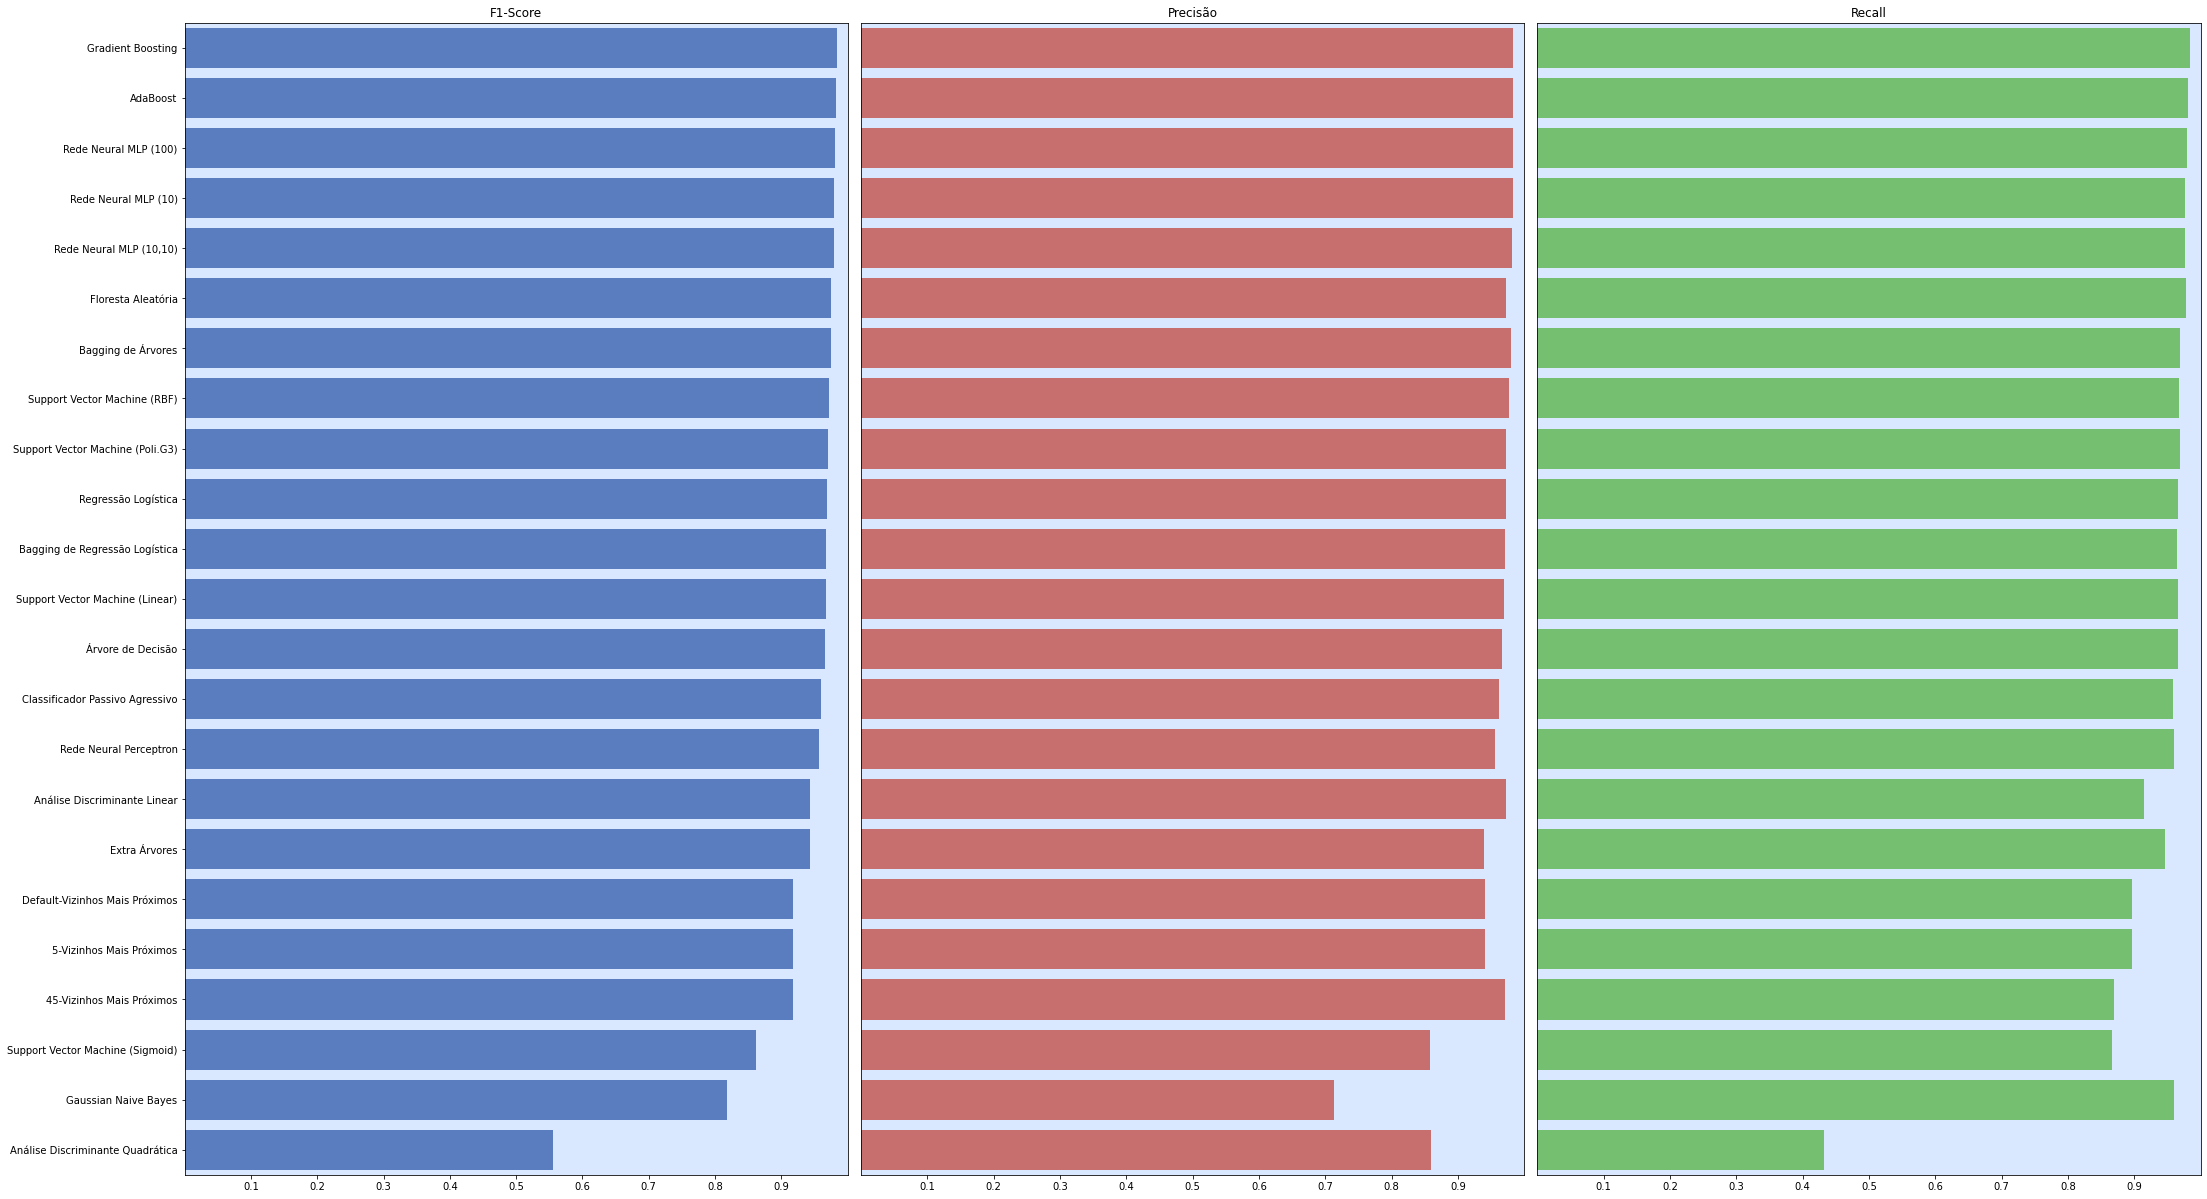

In [ ]:
#Gráficos relevantes
sns.set_color_codes("muted")
bgcolor = '#d9e7ff'
ticagem = [.1, .2, .3, .4, 0.5, .6,.7,.8,.9]
figura = plt.figure(figsize=(40,20)) 
figura.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=1)

plt.subplot(1, 3, 1)
plt.title('F1-Score')
acc = sns.barplot(x = resultados.iloc[:,0], y = resultados.index.values, color='b')
acc.axes.set_xlim([0, 1])
acc.xaxis.set_ticks(ticagem)
acc.set_facecolor(bgcolor)
plt.xlabel('')

plt.subplot(1, 3, 2)
plt.title('Precisão')
auc = sns.barplot(x = resultados.iloc[:,1], y = resultados.index.values, color='r')
auc.axes.get_yaxis().set_visible(False)
auc.axes.set_xlim([0, 1])
auc.xaxis.set_ticks(ticagem)
auc.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 3, 3)
plt.title('Recall')
f1 = sns.barplot(x = resultados.iloc[:,2], y = resultados.index.values, color='g')
f1.axes.set_xlim([0, 1])
f1.xaxis.set_ticks(ticagem)
f1.axes.get_yaxis().set_visible(False)
f1.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('') 

plt.show()
figura.savefig('medidas.pdf')#Salvando o gráfico

Um detalhe interessante é que a métrica F1-Score é uma média harmônica entre a Precisão e a Sensibilidade do modelo, por isso vemos que alguns modelos uma precisão maior, enquanto outros tem uma sensibilidade maior, alcançando quase os mesmos resultados do F1.

#5 Busca por Melhores Hiperparâmetros

Escolhido o melhor pré-processamento e melhores algoritmos vamos fazer a tunagem de hiperparâmetros utilizando a função GridSearch, que busca a combinação de todos os valores especificados e retorna aquele com o melhor desempenho para a métrica escolhida, que no nosso caso é o F1.

##5.1 Gradient Boosting

In [ ]:
parametros_Grad = { 'n_estimators' : np.arange(20,101,10), 
                    'learning_rate' : np.arange(0.01,0.32,0.03),
                    'max_depth': np.arange(3,10,3)
                 }

modeloGrad = GradientBoostingClassifier()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

grid_Grad = GridSearchCV(modeloGrad, param_grid = parametros_Grad,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 1, n_jobs = -1)

grid_Grad.fit(Xtreino_2, Ytreino_2)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

Fitting 100 folds for each of 297 candidates, totalling 29700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1650 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2200 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 2850 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3600 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 4450 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 6450 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 7600 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 8850 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 10200 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 11650 tasks     


F1-Score: 0.9837
Melhores parâmetros: {'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 70}



Os melhores parâmetros para o _Gradient_ levaram o modelo a alcançar o F1-Score de 98,37%. Um resultado muito bom se comparado com os outros modelos.

Melhores parâmetros: {'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 70}

##5.2 AdaBoost

In [ ]:
parametros_Ad = {'n_estimators': np.arange(20,101,10), 'learning_rate': np.arange(0.01,0.32,0.03), 'random_state': np.arange(3,10,3)}
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
modeloAd = AdaBoostClassifier()
grid_Ad = GridSearchCV(modeloAd, param_grid = parametros_Ad,scoring = 'f1', cv = validacao, verbose = 1 , n_jobs = -1)
grid_Ad.fit(Xtreino_2, Ytreino_2)#Treina o algorítimo com as especificações acima buscando melhores paramêtros
melhor_Ad = grid_Ad.best_estimator_ #'base_estimator': None , 'algorithm':'SAMME.R,verbose = 1 , n_jobs = -1

print('\nF1-Score: {:.4f}'.format(grid_Ad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Ad.best_params_))

Fitting 100 folds for each of 297 candidates, totalling 29700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |


F1-Score: 0.9819
Melhores parâmetros: {'learning_rate': 0.31, 'n_estimators': 100, 'random_state': 3}



A _AdaBoost_ teve um desempenho um pouco abaixo em relação aos parâmetros bases, sem que os ajustes dos hiperparâmetros resultassem em melhores resultados.

Melhores parâmetros: {'learning_rate': 0.31, 'n_estimators': 100, 'random_state': 3}

##5.3 Rede Neural MLP (100)

In [ ]:
parametros_MPL100 = {'hidden_layer_sizes': np.arange(20,101,10), 'max_iter': np.arange(20,101,10)}
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
modeloMPL100 = MLPClassifier()
grid_MPL100 = GridSearchCV(modeloMPL100, param_grid = parametros_MPL100,scoring = 'f1', cv = validacao, verbose = 1 , n_jobs = -1)
grid_MPL100.fit(Xtreino_2, Ytreino_2)#Treina o algorítimo com as especificações acima buscando melhores paramêtros
melhor_MPL100 = grid_MPL100.best_estimator_  

print('\nF1-Score: {:.4f}'.format(grid_MPL100.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_MPL100.best_params_))

Fitting 100 folds for each of 81 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed: 48.8min finished



F1-Score: 0.9824
Melhores parâmetros: {'hidden_layer_sizes': 90, 'max_iter': 100}



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Vemos que apesar do algoritmo base do MPL(100) ter se mostrado com F1-score = 98,12%,o reajuste dos hiperparâmetros resultaram em melhores resultados, F1-score = 98,24%.

Melhores parâmetros: {'hidden_layer_sizes': 90, 'max_iter': 100}

#6 Combinação por Votos

Encontrado os melhores hiperparâmetros para os modelos, vamos combinar os 3 e fazer um teste antes de submetermos para competição.

In [ ]:
modelo_Grad = GradientBoostingClassifier(learning_rate = 0.13, max_depth = 3, n_estimators = 70)

modelo_AdaB = AdaBoostClassifier(learning_rate = 0.31, n_estimators = 100, random_state = 3)

modelo_MLPC = MLPClassifier(hidden_layer_sizes= 90, max_iter= 100)


In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

#LISTA DE MODELOS - Nome do modelo + instancia do modelo
modelos = [('Gradiente', modelo_Grad), ('MLP ', modelo_MLPC),('AdaBoost', modelo_AdaB)]
#modelo de votos soft implementado 

modelo = VotingClassifier(modelos, voting = 'hard')

#medidas apuradas do modelo selecionado, vendo apenas a métrica F1-Score com o método kfold repetido
medidas = cross_validate(modelo, Xtreino_2, Ytreino_2, cv = validacao, scoring = 'f1', verbose = 2, n_jobs = -1)
medidas['test_score'].mean()#resultado para cada iteração e para cada repetição

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


0.9854967197043538

A combinação de modelos sugere um leve aumento se comparado com o _GradientBoosting_ sozinho. 

Mas foi um aumento significante para a colocação final no desafio.

#7 Submissão

Agora que temos os melhores modelos e as melhores técnicas para tratamento do conjunto de dados, vamos aplicar o mesmo pré-processamento ao conjunto de dados da submissão, treinar os modelos com todo conjunto de dados de teste e preparar o arquivo de submissão para a competição.

##7.1 Pré-Processamento Submissão

In [ ]:
#Fazendo o Mapeamento de categorias bivariadas
data_sub_map = data_sub.copy()
data_sub_map['Partner'] = data_sub_map['Partner'].map({'Yes': 1, 'No':0})
data_sub_map['Dependents'] = data_sub_map['Dependents'].map({'Yes': 1, 'No':0})
data_sub_map['PhoneService'] = data_sub_map['PhoneService'].map({'Yes': 1, 'No':0})
data_sub_map['PaperlessBilling'] = data_sub_map['PaperlessBilling'].map({'Yes': 1, 'No':0})
data_sub_map['gender'] = data_sub_map['gender'].map({'Male': 1, 'Female':0})


In [ ]:
sc = StandardScaler()
data_sub_norm = data_sub_map.copy()

aux0 = sc.fit_transform(data_sub_norm[['tenure']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux1 = pd.DataFrame(aux0, columns = ['Tenure'])#transforma num data frame o numpy array e adicionado ao data frame
data_sub_norm = pd.concat([data_sub_norm, aux1], axis = 1)#concatena com o o conjunto de dados
data_sub_norm.drop(['tenure'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados


In [ ]:
data_sub_norm_dumi = data_sub_norm.copy()
data_sub_norm_dumi = pd.get_dummies(data_sub_norm_dumi, columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MultipleLines'])
data_sub_norm_dumi.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Tenure,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,1,0,-0.393471,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,1,-0.229463,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,-1.254512,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,1,0.631577,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
4,1,0,1,0,1,1,1.574622,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0


#7.2 Fazendo a submissão

Agora vamos utilizar todo o conjunto de dados de teste para treinar novos modelos, fazer a combinação por votos e classificar as entradas do conjunto fornecido para submissão (2500 linhas). 

Guardaremos apenas as respostas (_Cliente_) na mesma ordem que foi fornecida em um arquivo .csv.

In [ ]:
#modelos_sub = [('Gradiente', modelo_Grad), ('MLP 100', modelo_MLPC),('Modelo Ada', modelo_AdaB)]
modelos_sub = [('Gradiente', modelo_Grad), ('Árvore', modelo_Randon), ('SVM', modelo_SVM),('Modelo Ada', modelo_AdaB)]
modelo_sub = VotingClassifier(modelos_sub, voting = 'hard')


modelo_sub.fit(Xtreino_2, Ytreino_2)
pred_sub = modelo_sub.predict(data_sub_norm_dumi)

In [ ]:
predicao_final = pd.DataFrame()
predicao_final['Cliente'] = pred_sub
#Escrevendo CSV
predicao_final.to_csv('D:\Submissão5.csv', index = False)

In [ ]:
predicao_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cliente  2500 non-null   int64
dtypes: int64(1)
memory usage: 19.7 KB


In [ ]:
predicao_final

,Cliente
0,0
1,1
2,0
3,1
4,1
...,...
2495,1
2496,0
2497,0
2498,0


#8 Conclusões
Durante a análise exploratória consegui identificar alguns fatores ligados a tenure, que levam a uma maior chance de o cliente ser premium, ou normal. Essa relação também foi encontrada quanto a _InternetService_,  _OnlineBackup_, _StreamingMovies_, _TechSuport_, _DeviceProtection_, _StreamingTV_, _OnlineSecurity_. Mas nenhuma delas foram capazes de nos dizer isoladamente se o cliente teria uma chance absoluta de ser premium ou não, por isso o emprego de modelos de machine learning se mostram uma ótima alternativa de relacionar informações.

A combinação dos modelos de _GradientBoosting, AdaBoost e MLP_ obteve resultados melhores que qualquer um dos três algoritmos sozinhos, e apesar de apenas o _Gradient_ ter alcançado os 98,35% de F1, a combinação com modelos mais fracos levou a resultados melhores.

#9 Considerações

O alto custo computacional foi um fator limitante para este projeto, mas uma melhoria no pré-processamento se mostrou mais eficaz do que uma tunagem de hiperparâmetros, por exemplo. Isso mostra que a qualidade do conjunto de dados tem maior impacto no resultado final do que os algoritmos empregados.

A abordagem com "pesos" para algumas categorias pode ser bem arbitrário e depende muito do conjunto de dados, uma abordagem tomada aqui, pode não ser a melhor para outro conjunto.

Apesar de obtermos 98,54 % de F1 aplicado a base de teste utilizando os algoritimos, o resultado final do modelo é de 93,14 % de F1-Score pois ocorreu Overfitting que é quando o modelo aprende demais sobre os dados.Assim não condizendo com a realizadade.

---
$ Ranking $ $geral:$

<p align="center">
<img src="https://github.com/WellingtonMartinsSantos/Competi-o-Flai/blob/main/Data/Placar%20Final%20FLAI.PNG?raw=true" />
</p>

Caso tenha alguma dúvida, sugestão ou crítica, por favor, não hesite em dizer.  Sua opinião será sempre bem-vinda. 


---
* [Meu LinkedIn](https://www.linkedin.com/in/wellington-martins-5a19638b/) 
* [Meus Projetos podem ser vistos aqui](https://github.com/WellingtonMartinsSantos)